<a href="https://colab.research.google.com/github/evelynlin2121/cgm_pred/blob/master/simulate_cgm_pred_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scenario 1: use cgm data of 9 adults predict 1 adult(60 days)

## import and concat 10 cgm data (adult)






In [74]:
import pandas as pd
from glob import glob
 
files = glob("/content/drive/MyDrive/cgm_pred/simulate_cgm_60days/adult*.csv")
 
df_list = [pd.read_csv(file) for file in files]

cgm_key = ["Time"]
cgm_value = [df_list[0]['Time']]
for i in range(len(df_list)): 
    cgm_key.append('CGM_NO_0'+ str(i+1))
    cgm_value.append(df_list[i]['CGM'])
new_data = dict(zip(cgm_key, cgm_value))
len(new_data)

11

In [75]:
concat_cgm = pd.DataFrame(data=new_data)
concat_cgm

,Time,CGM_NO_01,CGM_NO_02,CGM_NO_03,CGM_NO_04,CGM_NO_05,CGM_NO_06,CGM_NO_07,CGM_NO_08,CGM_NO_09,CGM_NO_010
0,2021-12-04 06:00:00,132.372142,134.482142,146.611025,143.022142,138.592142,139.152142,131.562142,131.182142,141.002142,148.752142
1,2021-12-04 06:03:00,131.164663,133.274663,145.403545,141.814663,137.384663,137.944663,130.354663,129.974663,139.794663,147.544663
2,2021-12-04 06:06:00,131.854524,133.964524,146.093406,142.504524,138.074524,138.634524,131.044524,130.664524,140.484524,148.234524
3,2021-12-04 06:09:00,133.589223,135.699223,147.828105,144.239223,139.809223,140.369223,132.779223,132.399223,142.219223,149.969223
4,2021-12-04 06:12:00,135.951553,138.061553,150.190435,146.601553,142.171553,142.731553,135.141553,134.761553,144.581553,152.331553
...,...,...,...,...,...,...,...,...,...,...,...
28796,2022-02-02 05:48:00,108.150661,107.709543,177.413791,165.076378,134.157576,114.158383,161.416710,147.825778,39.000000,157.565243
28797,2022-02-02 05:51:00,109.501158,110.768195,182.880087,170.285502,136.780418,116.111809,163.630054,150.336405,39.000000,162.761658
28798,2022-02-02 05:54:00,112.386440,115.291827,189.670861,176.844349,140.989724,119.502744,167.295034,154.217794,39.000000,169.364998
28799,2022-02-02 05:57:00,115.507244,119.950267,196.412449,183.390763,145.465298,123.029289,171.106565,158.166058,39.000000,176.017432


In [76]:
concat_cgm['Time'] = pd.to_datetime(concat_cgm['Time'], format="%Y-%m-%d %H:%M:%S")

## Find the mean of first 9 cgm data

In [77]:
concat_cgm_9 = concat_cgm.drop(['CGM_NO_010'], axis=1)
concat_cgm_9

,Time,CGM_NO_01,CGM_NO_02,CGM_NO_03,CGM_NO_04,CGM_NO_05,CGM_NO_06,CGM_NO_07,CGM_NO_08,CGM_NO_09
0,2021-12-04 06:00:00,132.372142,134.482142,146.611025,143.022142,138.592142,139.152142,131.562142,131.182142,141.002142
1,2021-12-04 06:03:00,131.164663,133.274663,145.403545,141.814663,137.384663,137.944663,130.354663,129.974663,139.794663
2,2021-12-04 06:06:00,131.854524,133.964524,146.093406,142.504524,138.074524,138.634524,131.044524,130.664524,140.484524
3,2021-12-04 06:09:00,133.589223,135.699223,147.828105,144.239223,139.809223,140.369223,132.779223,132.399223,142.219223
4,2021-12-04 06:12:00,135.951553,138.061553,150.190435,146.601553,142.171553,142.731553,135.141553,134.761553,144.581553
...,...,...,...,...,...,...,...,...,...,...
28796,2022-02-02 05:48:00,108.150661,107.709543,177.413791,165.076378,134.157576,114.158383,161.416710,147.825778,39.000000
28797,2022-02-02 05:51:00,109.501158,110.768195,182.880087,170.285502,136.780418,116.111809,163.630054,150.336405,39.000000
28798,2022-02-02 05:54:00,112.386440,115.291827,189.670861,176.844349,140.989724,119.502744,167.295034,154.217794,39.000000
28799,2022-02-02 05:57:00,115.507244,119.950267,196.412449,183.390763,145.465298,123.029289,171.106565,158.166058,39.000000


In [78]:
concat_cgm_9['Mean_9_CGM'] = concat_cgm_9.mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [79]:
concat_cgm_9.head()

,Time,CGM_NO_01,CGM_NO_02,CGM_NO_03,CGM_NO_04,CGM_NO_05,CGM_NO_06,CGM_NO_07,CGM_NO_08,CGM_NO_09,Mean_9_CGM
0,2021-12-04 06:00:00,132.372142,134.482142,146.611025,143.022142,138.592142,139.152142,131.562142,131.182142,141.002142,137.553129
1,2021-12-04 06:03:00,131.164663,133.274663,145.403545,141.814663,137.384663,137.944663,130.354663,129.974663,139.794663,136.345650
2,2021-12-04 06:06:00,131.854524,133.964524,146.093406,142.504524,138.074524,138.634524,131.044524,130.664524,140.484524,137.035511
3,2021-12-04 06:09:00,133.589223,135.699223,147.828105,144.239223,139.809223,140.369223,132.779223,132.399223,142.219223,138.770210
4,2021-12-04 06:12:00,135.951553,138.061553,150.190435,146.601553,142.171553,142.731553,135.141553,134.761553,144.581553,141.132540


In [80]:
mean_9_cgm = pd.DataFrame(concat_cgm_9, columns=['Time', 'Mean_9_CGM'])
mean_9_cgm.head()

,Time,Mean_9_CGM
0,2021-12-04 06:00:00,137.553129
1,2021-12-04 06:03:00,136.345650
2,2021-12-04 06:06:00,137.035511
3,2021-12-04 06:09:00,138.770210
4,2021-12-04 06:12:00,141.132540


In [81]:
mean_9_cgm.tail()

,Time,Mean_9_CGM
28796,2022-02-02 05:48:00,128.323202
28797,2022-02-02 05:51:00,131.032625
28798,2022-02-02 05:54:00,135.022086
28799,2022-02-02 05:57:00,139.114215
28800,2022-02-02 06:00:00,141.767310


In [82]:
len(mean_9_cgm)

28801

In [83]:
# Turn datas to numpy array
time_steps = mean_9_cgm["Time"].to_numpy()
mean_cgm_values =  mean_9_cgm["Mean_9_CGM"].to_numpy()

time_steps[:10], mean_cgm_values[:10]

(array(['2021-12-04T06:00:00.000000000', '2021-12-04T06:03:00.000000000',
        '2021-12-04T06:06:00.000000000', '2021-12-04T06:09:00.000000000',
        '2021-12-04T06:12:00.000000000', '2021-12-04T06:15:00.000000000',
        '2021-12-04T06:18:00.000000000', '2021-12-04T06:21:00.000000000',
        '2021-12-04T06:24:00.000000000', '2021-12-04T06:27:00.000000000'],
       dtype='datetime64[ns]'),
 array([137.55312924, 136.34564981, 137.03551093, 138.77020987,
        141.13253988, 143.70529418, 146.07126597, 147.81324845,
        148.51403477, 147.82089485]))

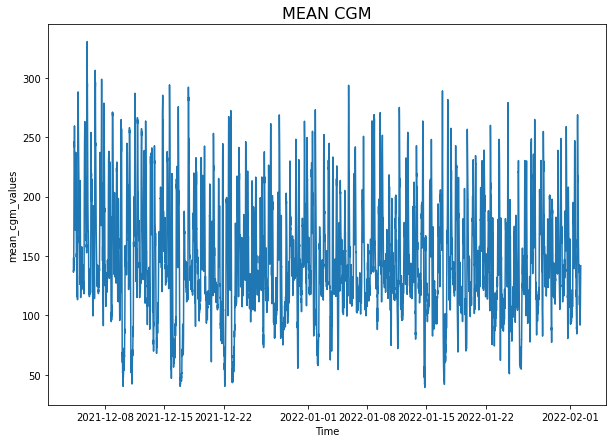

In [84]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(time_steps, mean_cgm_values)
plt.ylabel("mean_cgm_values")
plt.title("MEAN CGM", fontsize=16)
plt.xlabel("Time");

## Prepare NO_0010 data

In [85]:
cgm_no_010 = concat_cgm['CGM_NO_010'].to_numpy()
cgm_no_010

array([148.75214231, 147.54466289, 148.23452401, ..., 169.3649983 ,
       176.01743192, 180.95718049])

In [86]:
time_steps[:10], cgm_no_010[:10]

(array(['2021-12-04T06:00:00.000000000', '2021-12-04T06:03:00.000000000',
        '2021-12-04T06:06:00.000000000', '2021-12-04T06:09:00.000000000',
        '2021-12-04T06:12:00.000000000', '2021-12-04T06:15:00.000000000',
        '2021-12-04T06:18:00.000000000', '2021-12-04T06:21:00.000000000',
        '2021-12-04T06:24:00.000000000', '2021-12-04T06:27:00.000000000'],
       dtype='datetime64[ns]'),
 array([148.75214231, 147.54466289, 148.23452401, 149.96922296,
        152.331553  , 154.90430742, 157.27027951, 159.01226258,
        159.71304995, 159.01991173]))

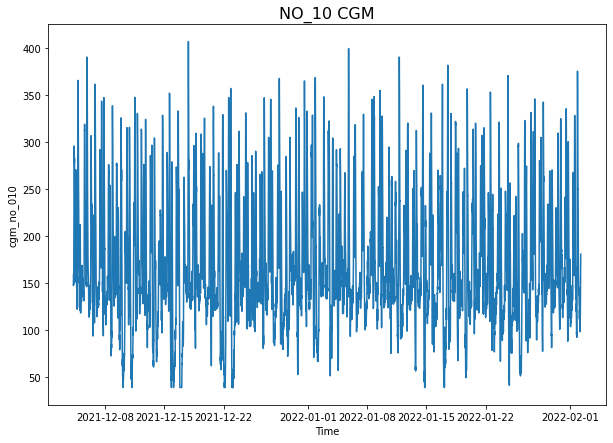

In [87]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(time_steps, cgm_no_010)
plt.ylabel("cgm_no_010")
plt.title("NO_10 CGM", fontsize=16)
plt.xlabel("Time");

## Create train, validation and test splits for  9 cgm mean data
* 70% train
* 10% validation
* 20% test


In [88]:
# Create train, validation and test splits for time series data(70% train, 10% validation, 20% test)
split_size = int(0.8 * len(mean_cgm_values))
val_size = int(7/8 * split_size)
# Create train data splits (everything before the split)
X_train, y_train = time_steps[:val_size], mean_cgm_values[:val_size]

# Create train data splits (everything before the split)
X_val, y_val = time_steps[val_size:split_size], mean_cgm_values[val_size:split_size]

# Create train data splits (everything beyond the split)
X_test, y_test = time_steps[split_size:], mean_cgm_values[split_size:]

len(X_train), len(X_val), len(X_test),  len(y_train), len(y_val), len(y_test)

(20160, 2880, 5761, 20160, 2880, 5761)

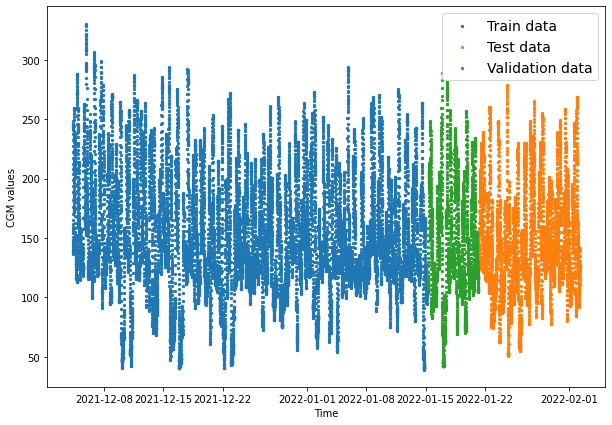

In [89]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.scatter(X_val, y_val, s=5, label="Validation data")
plt.xlabel("Time")
plt.ylabel("CGM values")
plt.legend(fontsize=14)
plt.show();

## Create train, validation and test splits for NO_010 data
70% train
10% validation
20% test

In [90]:
# Create train, validation and test splits for time series data(70% train, 10% validation, 20% test)
split_size_10 = int(0.8 * len(cgm_no_010))
val_size_10 = int(7/8 * split_size)
# Create train data splits (everything before the split)
X_train_10, y_train_10 = time_steps[:val_size_10], cgm_no_010[:val_size_10]

# Create train data splits (everything before the split)
X_val_10, y_val_10 = time_steps[val_size_10:split_size_10], cgm_no_010[val_size_10:split_size_10]

# Create train data splits (everything beyond the split)
X_test_10, y_test_10 = time_steps[split_size_10:], cgm_no_010[split_size_10:]

len(X_train_10), len(X_val_10), len(X_test_10),  len(y_train_10), len(y_val_10), len(y_test_10)

(20160, 2880, 5761, 20160, 2880, 5761)

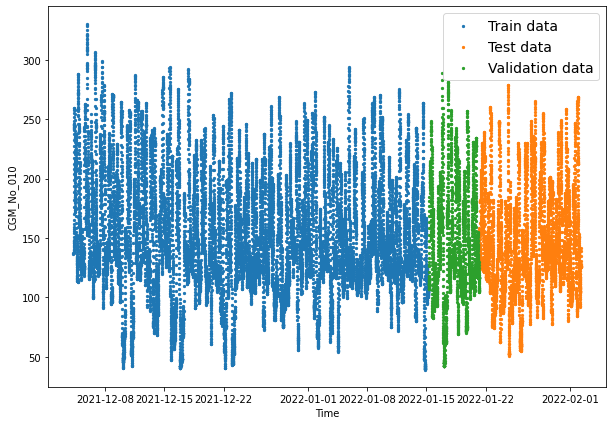

In [91]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.scatter(X_val, y_val, s=5, label="Validation data")
plt.xlabel("Time")
plt.ylabel("CGM_No_010")
plt.legend(fontsize=14)
plt.show();

## Create windowed data(30 mins(7 points) -> 60th mins(12th points))

In [92]:
# Setup window and horizon size
HORIZON = 1 # predict next 1 value
PREDICT_POINT = 12
WINDOW_SIZE = 7 # use the past 7 values to make the prediction

In [93]:
# Create function to window
def get_labelled_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    return x[:, :window_size], x[:, -horizon:]

In [94]:
# Create function to view Numpy arrays as windows 
import numpy as np

def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(predict_point+horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-predict_point), axis=0).T

    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    #print(windowed_array)

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, window_size=WINDOW_SIZE, horizon=HORIZON)
    return windows, labels

In [95]:
full_windows, full_labels= make_windows(mean_cgm_values, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT)
len(full_windows), len(full_windows)

(28789, 28789)

In [96]:
# View the first 5 windows/labels
for i in range(5):
    print(f"Window: {full_windows[i]} -> Label:{full_labels[i]}")

Window: [137.55312924 136.34564981 137.03551093 138.77020987 141.13253988
 143.70529418 146.07126597] -> Label:[140.20547596]
Window: [136.34564981 137.03551093 138.77020987 141.13253988 143.70529418
 146.07126597 147.81324845] -> Label:[138.28454096]
Window: [137.03551093 138.77020987 141.13253988 143.70529418 146.07126597
 147.81324845 148.51403477] -> Label:[137.99974509]
Window: [138.77020987 141.13253988 143.70529418 146.07126597 147.81324845
 148.51403477 147.82089485] -> Label:[139.65938381]
Window: [141.13253988 143.70529418 146.07126597 147.81324845 148.51403477
 147.82089485 145.76800517] -> Label:[142.79043072]


In [97]:
# View the last 5 windows/labels
for i in range(5):
    print(f"Window: {full_windows[i-5]} -> Label:{full_labels[i-5]}")

Window: [120.07983239 122.38024202 124.22317995 125.60024351 126.48689662
 126.84046677 126.71112603] -> Label:[128.32320213]
Window: [122.38024202 124.22317995 125.60024351 126.48689662 126.84046677
 126.71112603 126.31635277] -> Label:[131.03262542]
Window: [124.22317995 125.60024351 126.48689662 126.84046677 126.71112603
 126.31635277 125.89474178] -> Label:[135.02208586]
Window: [125.60024351 126.48689662 126.84046677 126.71112603 126.31635277
 125.89474178 125.66995854] -> Label:[139.11421479]
Window: [126.48689662 126.84046677 126.71112603 126.31635277 125.89474178
 125.66995854 125.85767788] -> Label:[141.76730971]


In [98]:
def make_train_val_test_splits(windows, labels, test_split=0.2):
    """
    Split matching pairs of windows and labels into train, validaiton and test splits.
    """
    split_size = int(len(windows) * (1-test_split))
    val_size = int(7/8 * split_size)
    train_windows = windows[:val_size]
    train_labels = labels[:val_size]
    val_windows = windows[val_size:split_size]
    val_labels = labels[val_size:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, val_windows, test_windows, train_labels, val_labels, test_labels

In [99]:
train_windows, val_windows, test_windows, train_labels, val_labels, test_labels = make_train_val_test_splits(full_windows, full_labels, test_split=0.2)

In [100]:
len(train_windows), len(val_windows), len(test_windows), len(train_labels), len(val_labels), len(test_labels)

(20152, 2879, 5758, 20152, 2879, 5758)

In [101]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                              verbose=0, # only output a limited amount of text
                                              save_best_only=True)

In [102]:
import tensorflow as tf
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy()}

In [103]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values a across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (similar to start but for the end)
    label : label to show on plot about values, defalut None
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("CGM value")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

## Create windowed data(30 mins(7 points) -> 60th mins(12th points)) for adult0010


In [104]:
full_windows_10, full_labels_10= make_windows(cgm_no_010, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT)
len(full_windows_10), len(full_windows_10)

(28789, 28789)

In [105]:
# View the first 3 windows/labels
for i in range(5):
    print(f"Window: {full_windows_10[i]} -> Label:{full_labels_10[i]}")

Window: [148.75214231 147.54466289 148.23452401 149.96922296 152.331553
 154.90430742 157.27027951] -> Label:[151.41881387]
Window: [147.54466289 148.23452401 149.96922296 152.331553   154.90430742
 157.27027951 159.01226258] -> Label:[149.56012594]
Window: [148.23452401 149.96922296 152.331553   154.90430742 157.27027951
 159.01226258 159.71304995] -> Label:[149.46021078]
Window: [149.96922296 152.331553   154.90430742 157.27027951 159.01226258
 159.71304995 159.01991173] -> Label:[151.5279435]
Window: [152.331553   154.90430742 157.27027951 159.01226258 159.71304995
 159.01991173 156.96703677] -> Label:[155.3920894]


In [106]:
train_windows_10, val_windows_10, test_windows_10, train_labels_10, val_labels_10, test_labels_10 = make_train_val_test_splits(full_windows_10, full_labels_10, test_split=0.2)

In [107]:
len(train_windows_10), len(val_windows_10), len(test_windows_10), len(train_labels_10), len(val_labels_10), len(test_labels_10)

(20152, 2879, 5758, 20152, 2879, 5758)

## Experiment 1(Dense model)
* Use the mean of no01-09 training a model
* Validated by no01-09 data
* Test on no010



In [108]:
import tensorflow as tf
from tensorflow.keras import layers

In [109]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(21)

In [110]:
model_1 = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows, val_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 9ms/step - loss: 20.5822 - mae: 20.5822 - mse: 1398.3313 - val_loss: 10.5434 - val_mae: 10.5434 - val_mse: 203.5470
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 10.0817 - mae: 10.0817 - mse: 185.1915 - val_loss: 10.4540 - val_mae: 10.4540 - val_mse: 192.6908
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 9.8771 - mae: 9.8771 - mse: 175.2773 - val_loss: 10.0381 - val_mae: 10.0381 - val_mse: 181.0276
Epoch 4/200
158/158 [==============================] - 1s 6ms/step - loss: 9.7490 - mae: 9.7490 - mse: 170.7549 - val_loss: 9.8919 - val_mae: 9.8919 - val_mse: 177.3789
Epoch 5/200
158/158 [==============================] - 0s 2ms/step - loss: 9.6272 - mae: 9.6272 - mse: 166.1057 - val_loss: 9.9045 - val_mae: 9.9045 - val_mse: 177.4551
Epoch 6/200
158/158 [==============================] - 1s 6ms/step - loss: 9.5416 - mae: 9.5416 - mse: 163.0176 - val_loss: 9.6147 - val_mae: 9.

In [111]:
def make_preds(model, input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    ----------
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [112]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows_10, test_labels_10)

180/180 [==============================] - 0s 1ms/step - loss: 8.2966 - mae: 8.2966 - mse: 134.7536


[8.296610832214355, 8.296610832214355, 134.7536163330078]

In [113]:
# predict #adult010 using model_1
model_1_preds = make_preds(model_1, test_windows_10)
len(model_1_preds), model_1_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.59743, 157.05177, 161.76115, 166.53604, 170.9026 , 174.71053,
        177.93361, 180.53172, 182.3756 , 183.2933 ], dtype=float32)>)

In [114]:
len(test_labels_10), len(model_1_preds)

(5758, 5758)

In [115]:
test_labels_10[:10], model_1_preds[:10]

(array([[164.44620561],
        [167.86313049],
        [170.98543353],
        [173.71031656],
        [175.93498192],
        [177.55663242],
        [179.25585227],
        [181.51329406],
        [182.36198057],
        [182.00645027]]), <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.59743, 157.05177, 161.76115, 166.53604, 170.9026 , 174.71053,
        177.93361, 180.53172, 182.3756 , 183.2933 ], dtype=float32)>)

In [116]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels_10), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 8.29661, 'mape': 5.2880216, 'mse': 134.75362, 'rmse': 11.608342}

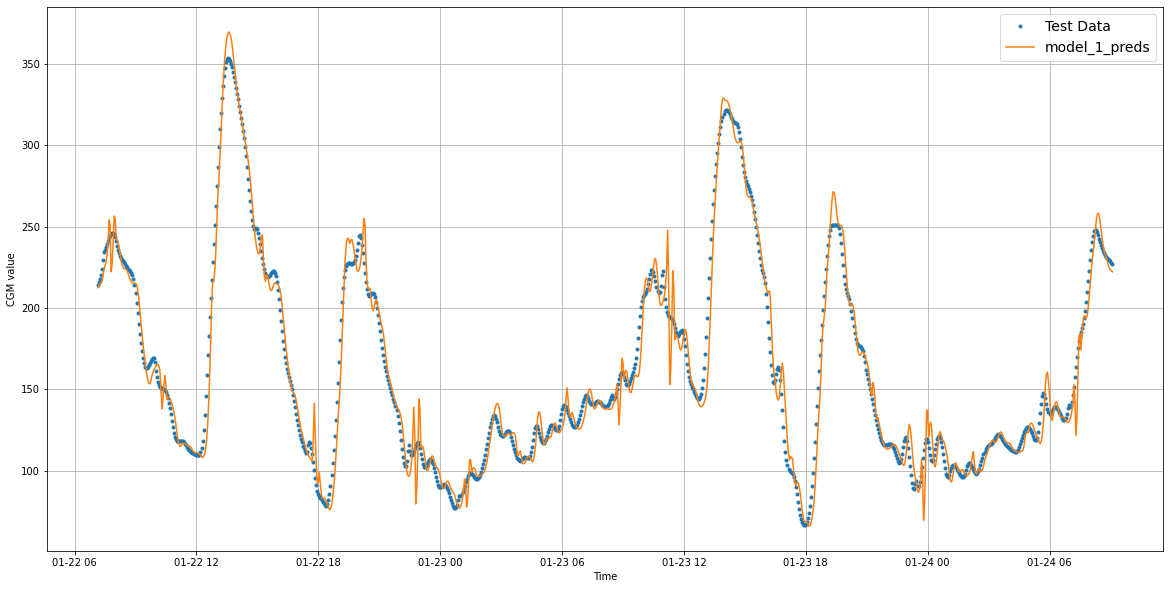

In [117]:
# Plot model 1 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 10))
plot_time_series(timesteps=X_test[-len(test_windows_10):],
                 values=test_labels_10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_10):],
                 values=model_1_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_preds")

## Experiment 2(Dense model)
* Use no010 data training a model
* Validated by no10 data
* make prediction on no010




In [118]:
model_1_a = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON)
], name="model_1_a_dense")

model_1_a.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_a.fit(x=train_windows_10,
            y=train_labels_10,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10, val_labels_10),
            callbacks=[create_model_checkpoint(model_name=model_1_a.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 8ms/step - loss: 24.4080 - mae: 24.4080 - mse: 1381.0957 - val_loss: 19.2977 - val_mae: 19.2977 - val_mse: 805.8823
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 15.8999 - mae: 15.8999 - mse: 565.3735 - val_loss: 14.0286 - val_mae: 14.0286 - val_mse: 409.7123
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 12.3673 - mae: 12.3673 - mse: 309.1410 - val_loss: 12.8575 - val_mae: 12.8575 - val_mse: 312.6252
Epoch 4/200
158/158 [==============================] - 1s 9ms/step - loss: 11.8064 - mae: 11.8064 - mse: 266.6823 - val_loss: 12.4661 - val_mae: 12.4661 - val_mse: 292.4879
Epoch 5/200
158/158 [==============================] - 0s 2ms/step - loss: 11.3465 - mae: 11.3465 - mse: 248.5918 - val_loss: 12.5824 - val_mae: 12.5824 - val_mse: 305.0026
Epoch 6/200
158/158 [==============================] - 1s 7ms/step - loss: 11.2166 - mae: 11.2166 - mse: 241.1367 - val_loss: 11.9172 

In [119]:
model_1_a = tf.keras.models.load_model("model_experiments/model_1_a_dense/")

In [120]:
# Make predictions using model_1 on the test dataset and view the results
model_1_a_preds = make_preds(model_1_a, test_windows_10)
len(model_1_a_preds), model_1_a_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([151.19983, 154.78137, 158.67645, 162.72609, 167.444  , 171.43604,
        174.65088, 177.01646, 178.38481, 179.05896], dtype=float32)>)

In [121]:
# Evaluate preds
model_1_a_results = evaluate_preds(y_true=tf.squeeze(test_labels_10), # reduce to right shape
                                 y_pred=model_1_a_preds)
model_1_a_results

{'mae': 8.393842, 'mape': 5.389599, 'mse': 136.30042, 'rmse': 11.674777}

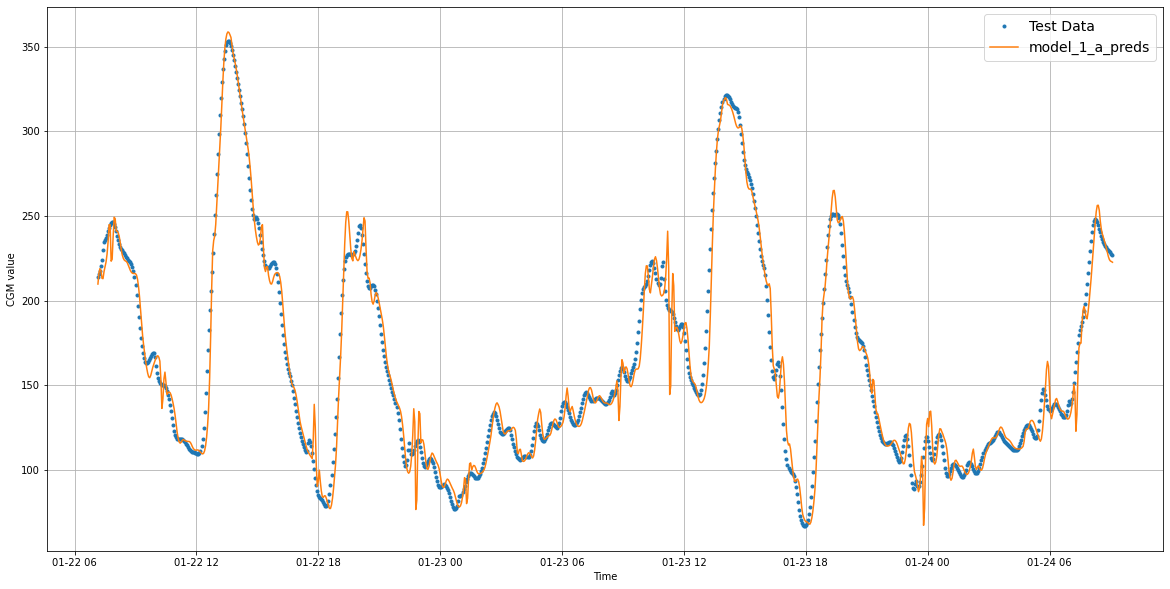

In [122]:
# Plot model 1_a predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 10))
plot_time_series(timesteps=X_test[-len(test_windows_10):],
                 values=test_labels_10[:, 0],
                 start=offset_s,
                 end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_10):],
                 values=model_1_a_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_a_preds")


## Experiment 3(Dense model)
* Use the mean of no01-09 training a model
* Validated by no10 data
* Test on no010




In [123]:
model_1_b = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_b_dense")

model_1_b.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_b.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10, val_labels_10),
            callbacks=[create_model_checkpoint(model_name=model_1_b.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 8ms/step - loss: 22.4660 - mae: 22.4660 - mse: 1342.7108 - val_loss: 19.8627 - val_mae: 19.8627 - val_mse: 821.0837
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 12.1583 - mae: 12.1583 - mse: 294.3181 - val_loss: 16.1513 - val_mae: 16.1513 - val_mse: 534.0941
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 10.4014 - mae: 10.4014 - mse: 203.7647 - val_loss: 13.4752 - val_mae: 13.4752 - val_mse: 359.8206
Epoch 4/200
158/158 [==============================] - 1s 7ms/step - loss: 9.6865 - mae: 9.6865 - mse: 169.6163 - val_loss: 12.9040 - val_mae: 12.9040 - val_mse: 320.1396
Epoch 5/200
158/158 [==============================] - 1s 7ms/step - loss: 9.4225 - mae: 9.4225 - mse: 159.0809 - val_loss: 12.5759 - val_mae: 12.5759 - val_mse: 307.2956
Epoch 6/200
158/158 [==============================] - 0s 2ms/step - loss: 9.3269 - mae: 9.3269 - mse: 155.2455 - val_loss: 12.6200 - val_

In [124]:
model_1_b = tf.keras.models.load_model("model_experiments/model_1_b_dense/")

In [125]:
# Make predictions using model_1 on the test dataset and view the results
model_1_b_preds = make_preds(model_1_b, test_windows_10)
len(model_1_b_preds), model_1_b_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([151.20546, 155.86995, 160.85774, 165.79678, 170.22707, 174.01768,
        177.19084, 179.67311, 181.3088 , 181.94057], dtype=float32)>)

In [126]:
# Evaluate preds
model_1_b_results = evaluate_preds(y_true=tf.squeeze(test_labels_10), # reduce to right shape
                                 y_pred=model_1_b_preds)
model_1_b_results

{'mae': 8.241069, 'mape': 5.2564707, 'mse': 135.8699, 'rmse': 11.656324}

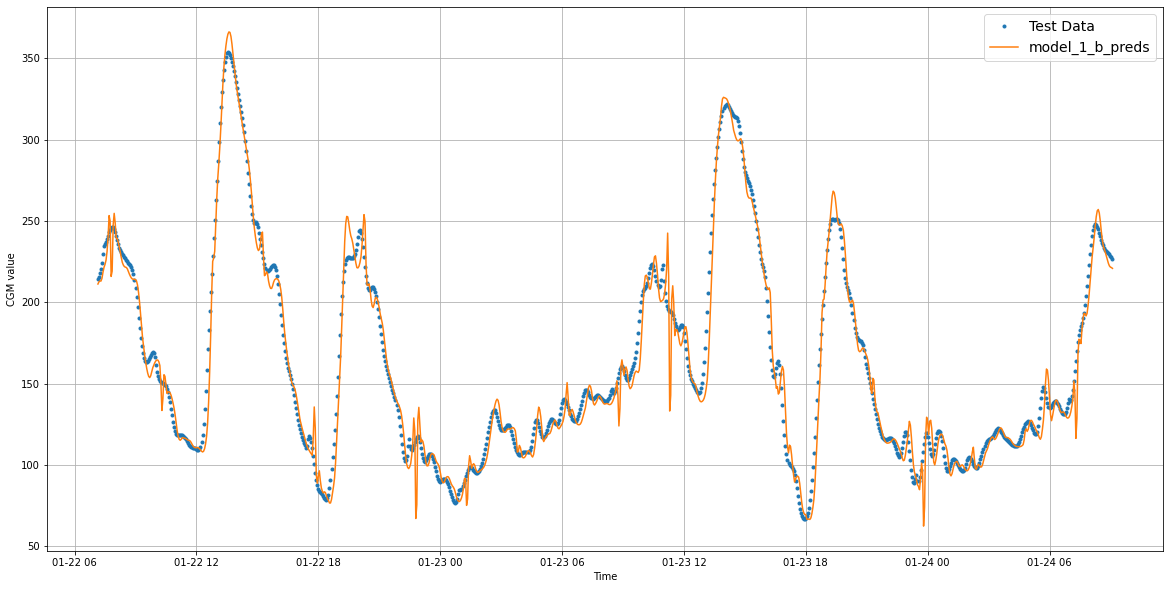

In [127]:
# Plot model_1_b predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 10))
plot_time_series(timesteps=X_test[-len(test_windows_10):],
                 values=test_labels_10[:, 0],
                 start=offset_s,
                 end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_10):],
                 values=model_1_b_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_b_preds")

# scenario 2: use cgm data of 1 adults to self predict(7 days)

## prepare NO_0010 data (only last 1 week)

In [128]:
time_steps_7d = time_steps[:3360]
cgm_no_010_7d = cgm_no_010[:3360]

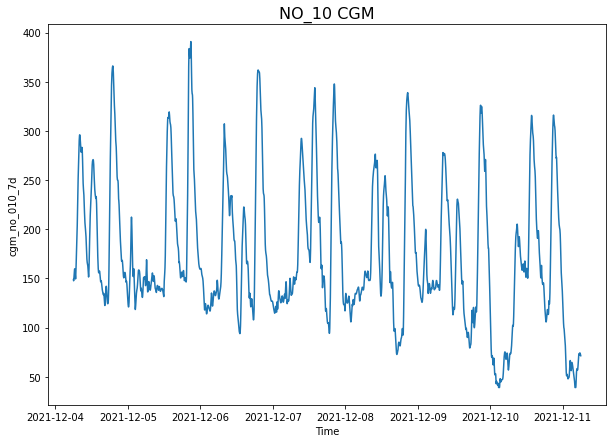

In [129]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(time_steps_7d, cgm_no_010_7d)
plt.ylabel("cgm_no_010_7d")
plt.title("NO_10 CGM", fontsize=16)
plt.xlabel("Time");

## Create train, validation and test splits for No_0010_7d
* 70% train
* 10% validation
* 20% test


In [130]:
# Create train, validation and test splits for time series data
split_size = int(0.8 * len(cgm_no_010_7d))
val_size = int(7/8 * split_size)
# Create train data splits (everything before the split)
X_train, y_train = time_steps_7d[:val_size], cgm_no_010_7d[:val_size]

# Create train data splits (everything before the split)
X_val, y_val = time_steps_7d[val_size:split_size], cgm_no_010_7d[val_size:split_size]

# Create train data splits (everything beyond the split)
X_test, y_test = time_steps_7d[split_size:], cgm_no_010_7d[split_size:]

len(X_train), len(X_val), len(X_test),  len(y_train), len(y_val), len(y_test)

(2352, 336, 672, 2352, 336, 672)

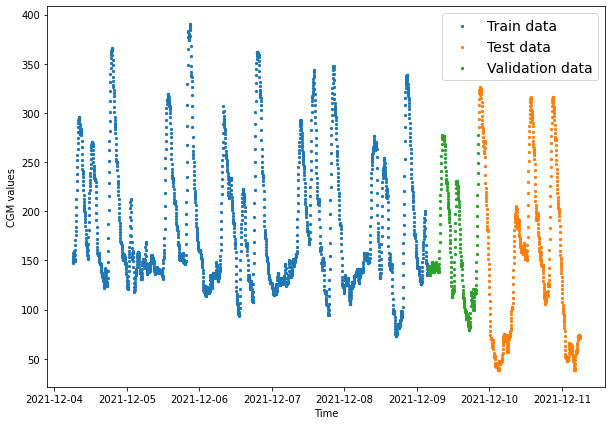

In [131]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.scatter(X_val, y_val, s=5, label="Validation data")
plt.xlabel("Time")
plt.ylabel("CGM values")
plt.legend(fontsize=14)
plt.show();

## Create windowed data(30 mins(7 points) -> 60th mins(12th points)) for no_010_7d

In [132]:
full_windows_10_7d, full_labels_10_7d= make_windows(cgm_no_010_7d, window_size=WINDOW_SIZE, horizon=HORIZON, predict_point=PREDICT_POINT)
len(full_windows_10_7d), len(full_windows_10_7d)

(3348, 3348)

In [133]:
# View the first 3 windows/labels
for i in range(5):
    print(f"Window: {full_windows_10_7d[i]} -> Label:{full_labels_10_7d[i]}")

Window: [148.75214231 147.54466289 148.23452401 149.96922296 152.331553
 154.90430742 157.27027951] -> Label:[151.41881387]
Window: [147.54466289 148.23452401 149.96922296 152.331553   154.90430742
 157.27027951 159.01226258] -> Label:[149.56012594]
Window: [148.23452401 149.96922296 152.331553   154.90430742 157.27027951
 159.01226258 159.71304995] -> Label:[149.46021078]
Window: [149.96922296 152.331553   154.90430742 157.27027951 159.01226258
 159.71304995 159.01991173] -> Label:[151.5279435]
Window: [152.331553   154.90430742 157.27027951 159.01226258 159.71304995
 159.01991173 156.96703677] -> Label:[155.3920894]


In [134]:
train_windows_10_7d, val_windows_10_7d, test_windows_10_7d, train_labels_10_7d, val_labels_10_7d, test_labels_10_7d = make_train_val_test_splits(full_windows_10_7d, full_labels_10_7d, test_split=0.2)

In [135]:
len(train_windows_10_7d), len(val_windows_10_7d), len(test_windows_10_7d), len(train_labels_10_7d), len(val_labels_10_7d), len(test_labels_10_7d)

(2343, 335, 670, 2343, 335, 670)


## Experiment 4(Dense model) 7days
* Use no10 data training a model
* Validated by no10 data
* Test on no010




In [136]:
model_2 = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_dense") 

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=train_windows_10_7d,
            y=train_labels_10_7d,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10_7d, val_labels_10_7d),
            callbacks=[create_model_checkpoint(model_name=model_2.name)]
            )

Epoch 1/200
19/19 [==============================] - 2s 70ms/step - loss: 38.1052 - mae: 38.1052 - mse: 2653.1621 - val_loss: 21.8369 - val_mae: 21.8369 - val_mse: 994.7681
Epoch 2/200
19/19 [==============================] - 1s 42ms/step - loss: 23.3062 - mae: 23.3062 - mse: 1264.0453 - val_loss: 21.0273 - val_mae: 21.0273 - val_mse: 898.5541
Epoch 3/200
19/19 [==============================] - 1s 43ms/step - loss: 21.4636 - mae: 21.4636 - mse: 1086.8105 - val_loss: 20.0407 - val_mae: 20.0407 - val_mse: 895.0856
Epoch 4/200
19/19 [==============================] - 1s 42ms/step - loss: 20.3582 - mae: 20.3582 - mse: 990.3344 - val_loss: 19.3749 - val_mae: 19.3749 - val_mse: 849.0588
Epoch 5/200
19/19 [==============================] - 1s 40ms/step - loss: 19.4036 - mae: 19.4036 - mse: 894.6383 - val_loss: 19.0738 - val_mae: 19.0738 - val_mse: 817.9705
Epoch 6/200
19/19 [==============================] - 1s 42ms/step - loss: 18.8995 - mae: 18.8995 - mse: 845.8640 - val_loss: 17.8499 - va

In [137]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")

In [138]:
# Make predictions using model_1 on the test dataset and view the results
model_2_preds = make_preds(model_2, test_windows_10_7d)
len(model_2_preds), model_2_preds[:10]

(670, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([297.61206, 303.90173, 309.0067 , 313.51093, 317.86017, 322.30664,
        326.67667, 330.1705 , 331.94934, 331.42566], dtype=float32)>)

In [139]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_10_7d), # reduce to right shape
                                 y_pred=model_2_preds)
model_2_results

{'mae': 9.763881, 'mape': 9.583166, 'mse': 166.61786, 'rmse': 12.908054}

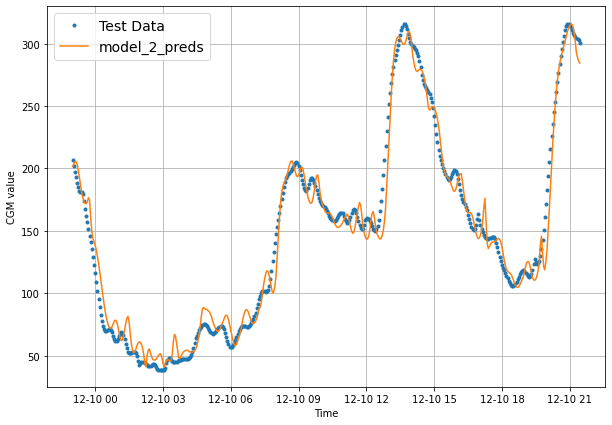

In [140]:
# Plot model_2 predictions
offset_s = 50
offset_e = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows_10_7d):],
                 values=test_labels_10_7d[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_10_7d):],
                 values=model_2_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_preds")


## Experiment 5(Dense model) 7days
* Use the mean of no01-09 training a model
* Validated by no10 data
* Test on no010




In [141]:
model_2_a = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_a_dense")

model_2_a.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_a.fit(x=train_windows,
            y=train_labels,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_10_7d, val_labels_10_7d),
            callbacks=[create_model_checkpoint(model_name=model_2_a.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 31.3286 - mae: 31.3286 - mse: 2796.5144 - val_loss: 20.4240 - val_mae: 20.4240 - val_mse: 899.2719
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 12.4651 - mae: 12.4651 - mse: 309.2548 - val_loss: 15.0978 - val_mae: 15.0978 - val_mse: 444.9355
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 10.3538 - mae: 10.3538 - mse: 195.6096 - val_loss: 13.5806 - val_mae: 13.5806 - val_mse: 331.0009
Epoch 4/200
158/158 [==============================] - 1s 6ms/step - loss: 10.0666 - mae: 10.0666 - mse: 181.8487 - val_loss: 13.2147 - val_mae: 13.2147 - val_mse: 313.5460
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 9.7936 - mae: 9.7936 - mse: 172.5278 - val_loss: 12.8743 - val_mae: 12.8743 - val_mse: 292.8746
Epoch 6/200
158/158 [==============================] - 1s 8ms/step - loss: 9.5502 - mae: 9.5502 - mse: 164.0347 - val_loss: 12.3435 - va

In [142]:
model_2_a = tf.keras.models.load_model("model_experiments/model_2_a_dense/")

In [143]:
# Make predictions using model_1 on the test dataset and view the results
model_2_a_preds = make_preds(model_2_a, test_windows_10_7d)
len(model_2_a_preds), model_2_a_preds[:10]

(670, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([300.18866, 307.03802, 313.32574, 319.43124, 325.32776, 330.8943 ,
        335.66357, 338.51813, 338.7859 , 336.73828], dtype=float32)>)

In [144]:
# Evaluate preds
model_2_a_results = evaluate_preds(y_true=tf.squeeze(test_labels_10_7d), # reduce to right shape
                                 y_pred=model_2_a_preds)
model_2_a_results

{'mae': 8.263334, 'mape': 7.69128, 'mse': 123.57269, 'rmse': 11.116325}

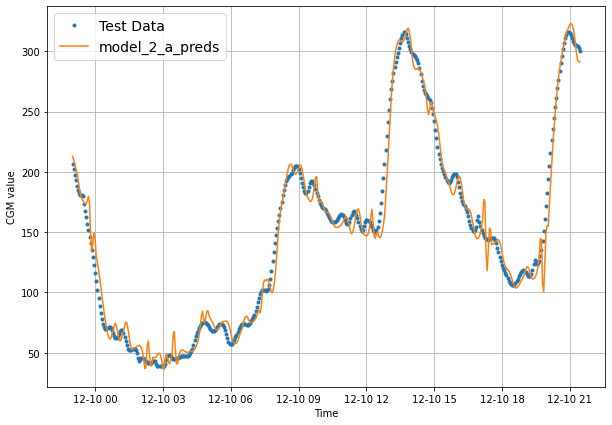

In [145]:
# Plot model_2_a predictions
offset_s = 50
offset_e = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows_10_7d):],
                 values=test_labels_10_7d[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows_10_7d):],
                 values=model_2_a_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_a_preds")